# Sentiment Analysis with Python


# US Presidential Elections 2016 First GOP  (2015)

### The dataset has over ten thousand tweets about the early August 2015 GOP debate in Ohio. You are required to do some EDA and sentiment analysis

<img src="https://i.insider.com/583c8f50ba6eb69a018b66b9?width=1136&format=jpeg" width=600 height=600 />




## Import and read data

In [1]:
import numpy as np
import pandas as pd
import nltk
import random
import string

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
senti = pd.read_csv("Sentiment.csv")

In [5]:
senti.head()

,candidate,sentiment,sentiment_confidence,subject_matter,retweet_count,text
0,Scott Walker,Positive,0.6333,None of the above,26,RT @ScottWalker: Didn't catch the full #GOPdeb...
1,No candidate mentioned,Positive,1.0000,None of the above,138,RT @RobGeorge: That Carly Fiorina is trending ...
2,Donald Trump,Positive,0.7045,None of the above,156,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
3,Ted Cruz,Positive,0.6332,None of the above,228,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
4,No candidate mentioned,Negative,0.6761,FOX News or Moderators,17,RT @warriorwoman91: I liked her and was happy ...


In [6]:
senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10669 entries, 0 to 10668
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   candidate             10669 non-null  object 
 1   sentiment             10669 non-null  object 
 2   sentiment_confidence  10669 non-null  float64
 3   subject_matter        10463 non-null  object 
 4   retweet_count         10669 non-null  int64  
 5   text                  10669 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 500.2+ KB


In [7]:
senti.candidate.fillna("No candidate mentioned",inplace=True)

In [8]:
senti.subject_matter.fillna("None of the above",inplace=True)

In [9]:
senti.isnull().sum().sum()

0

## Plots

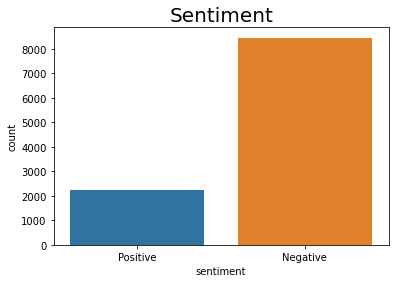

In [10]:
sns.countplot(senti.sentiment)
plt.title('Sentiment', fontsize=20)
plt.show()

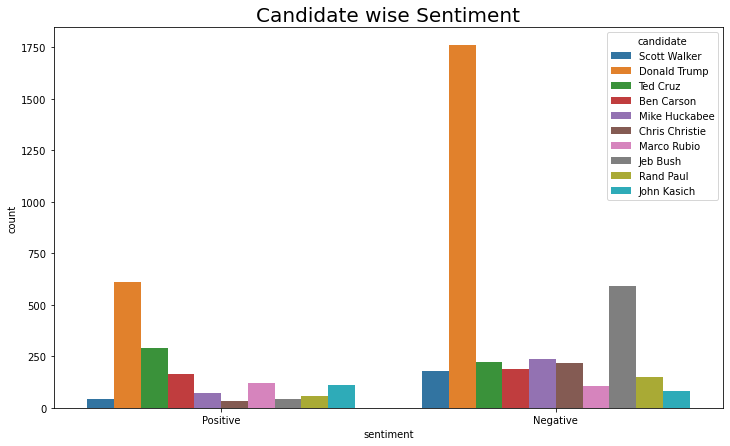

In [11]:
plt.figure(figsize=(12,7))

sns.countplot(senti[senti.candidate!= "No candidate mentioned"].sentiment,
              hue=senti[senti.candidate!= "No candidate mentioned"].candidate)

plt.title('Candidate wise Sentiment', fontsize=20)

plt.show()

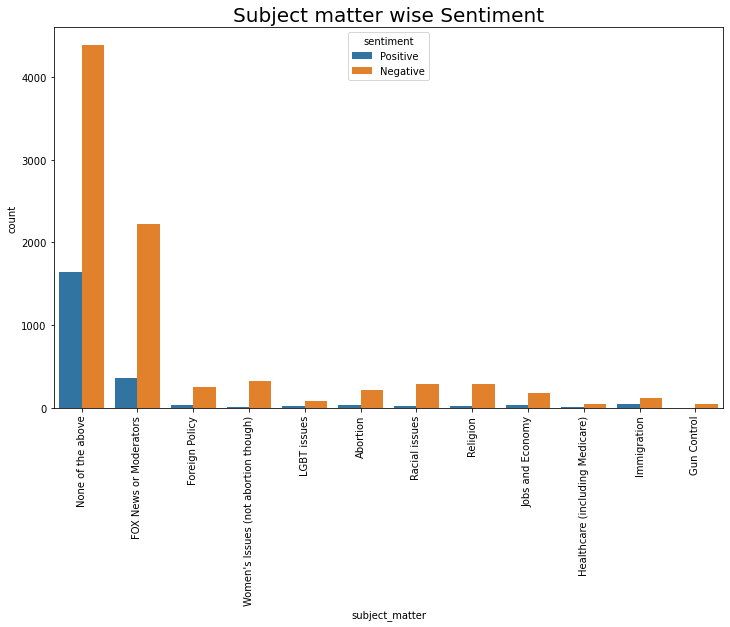

In [12]:
plt.figure(figsize=(12,7))

sns.countplot(senti.subject_matter,hue=senti.sentiment)

plt.xticks(rotation=90)

plt.title('Subject matter wise Sentiment', fontsize=20)

plt.show()

**Average Tweet Length**

In [13]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

senti['avg_word'] = senti['text'].apply(lambda x: avg_word(x))
senti[['text','avg_word']].head()

,text,avg_word
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,5.714286
1,RT @RobGeorge: That Carly Fiorina is trending ...,4.640000
2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,7.294118
3,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",5.800000
4,RT @warriorwoman91: I liked her and was happy ...,5.086957


**Number of Characters- including spaces**

In [14]:
senti['char_count'] = senti['text'].str.len()
senti[['text','char_count']].head()

,text,char_count
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,140
1,RT @RobGeorge: That Carly Fiorina is trending ...,140
2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,140
3,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",135
4,RT @warriorwoman91: I liked her and was happy ...,140


## Preprocessing

**Lowercase**

In [15]:
senti['text'] = senti['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
senti['text'].head()

0    rt @scottwalker: didn't catch the full #gopdeb...
1    rt @robgeorge: that carly fiorina is trending ...
2    rt @danscavino: #gopdebate w/ @realdonaldtrump...
3    rt @gregabbott_tx: @tedcruz: "on my first day ...
4    rt @warriorwoman91: i liked her and was happy ...
Name: text, dtype: object

**Special Characters Removal**

In [16]:
senti['text']= senti['text'].str.replace('rt ',"").str.replace('@','').str.replace('#','').str.replace('[^\w\s]','').str.replace('[1-9]','')

In [17]:
senti.text.head()

0    scottwalker didnt catch the full gopdebate las...
1    robgeorge that carly fiorina is trending  hour...
2    danscavino gopdebate w realdonaldtrump deliver...
3    gregabbott_tx tedcruz on my first day i will r...
4    warriorwoman i liked her and was happy when i ...
Name: text, dtype: object

**Stemming**

In [18]:
from nltk.stem import PorterStemmer

st = PorterStemmer()
senti.text=senti['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

**Removing Stopwords**

In [20]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [21]:
all_words = [x for x in pd.Series(' '.join(senti['text']).split())] 

In [22]:
all_words_clean = [word for word in all_words if word not in stopwords]

In [23]:
all_words_clean[:5]

['scottwalk', 'didnt', 'catch', 'full', 'gopdeb']

In [24]:
all_words_freq = nltk.FreqDist(all_words_clean)

In [25]:
all_words_freq

FreqDist({'gopdeb': 11171, 'rwsurfergirl': 1814, 'trump': 1543, 'fox': 1201, 'thi': 1024, 'debat': 957, 'wa': 933, 'realdonaldtrump': 929, 'candid': 893, 'amp': 859, ...})

In [26]:
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [27]:
word_features[:2]

['gopdeb', 'rwsurfergirl']

In [28]:
word_features=set(word_features)

In [29]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [30]:
frame = senti[['text','sentiment']]
frame.columns = ["feature", "label"]
feature = frame.feature
label = frame.label

In [31]:
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [32]:
len(featuresets)

10669

In [33]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

In [34]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [35]:
print(nltk.classify.accuracy(classifier, test_set))

0.8109965635738832


## Additional Stuff

**Word Cloud**

In [38]:
#!pip install wordcloud

In [39]:
from wordcloud import WordCloud,STOPWORDS

In [40]:
df=senti[senti['sentiment']=='Positive']

df.head()

,candidate,sentiment,sentiment_confidence,subject_matter,retweet_count,text,avg_word,char_count
0,Scott Walker,Positive,0.6333,None of the above,26,scottwalk didnt catch the full gopdeb last nig...,5.714286,140
1,No candidate mentioned,Positive,1.0000,None of the above,138,robgeorg that carli fiorina is trend hour afte...,4.640000,140
2,Donald Trump,Positive,0.7045,None of the above,156,danscavino gopdeb w realdonaldtrump deliv the ...,7.294118,140
3,Ted Cruz,Positive,0.6332,None of the above,228,gregabbott_tx tedcruz on my first day i will r...,5.800000,135
8,Mike Huckabee,Positive,1.0000,Foreign Policy,188,waynedupreeshow just woke up to tweet thi out ...,6.222222,131


In [41]:
words = ' '.join(df['text'])

In [42]:
# let's make a wordcloud for Positive sentiments

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [43]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

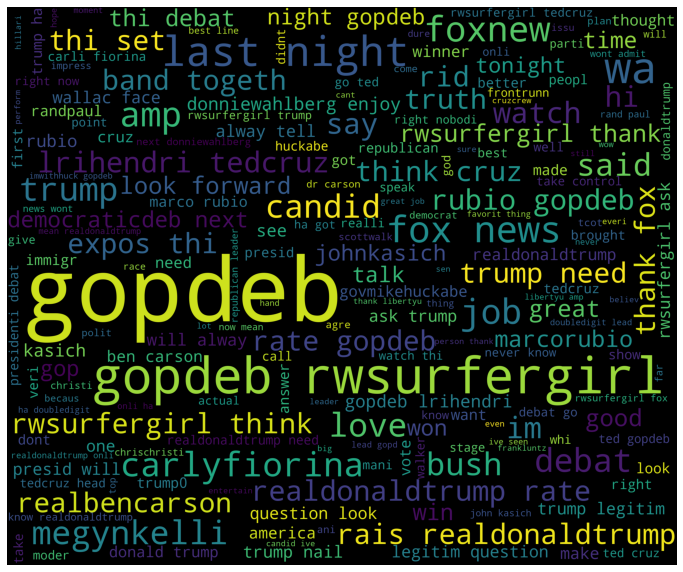

In [44]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

                                        Happy Learning 